In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
!pip install ultralytics


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 21.2 MB/s eta 0:00:00


In [4]:
import pandas as pd
from ultralytics import YOLO
import numpy as np
import cv2
import os
from collections import Counter
model = YOLO("yolov8n.pt")


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [6]:
import torch
print("CUDA available:", torch.cuda.is_available())


CUDA available: False


In [7]:
from google.colab import files
uploaded = files.upload()
image_path = next(iter(uploaded))
results = model.predict(source=image_path, conf=0.4, save=True)


Saving Traffic-Congestion-at-Melbourne-Airport-in-Australia.jpg to Traffic-Congestion-at-Melbourne-Airport-in-Australia.jpg

image 1/1 /content/Traffic-Congestion-at-Melbourne-Airport-in-Australia.jpg: 480x640 17 cars, 2 traffic lights, 370.0ms
Speed: 14.2ms preprocess, 370.0ms inference, 37.7ms postprocess per image at shape (1, 3, 480, 640)
Results saved to /content/runs/detect/predict


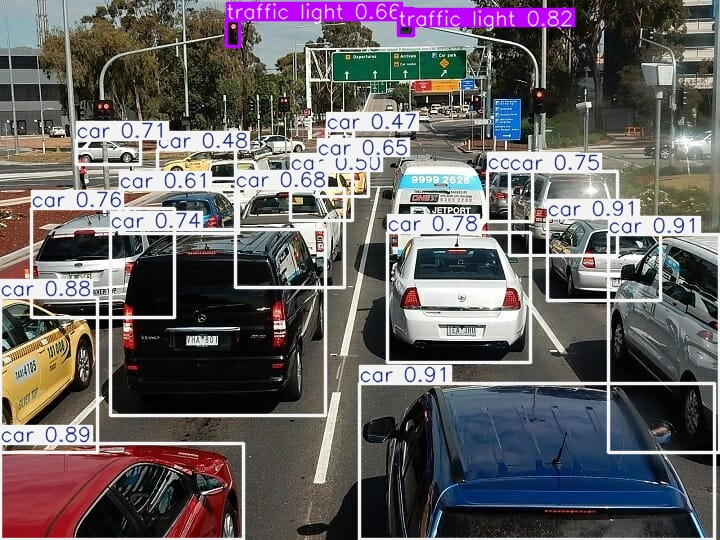

In [8]:
import glob
from IPython.display import Image, display
output_path = glob.glob('runs/detect/predict/*.jpg')[0]
display(Image(filename=output_path))



image 1/1 /content/Traffic-Congestion-at-Melbourne-Airport-in-Australia.jpg: 480x640 22 cars, 1 truck, 3 traffic lights, 173.5ms
Speed: 4.6ms preprocess, 173.5ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)
Detected Objects:
Car: 22
Traffic light: 3
Truck: 1


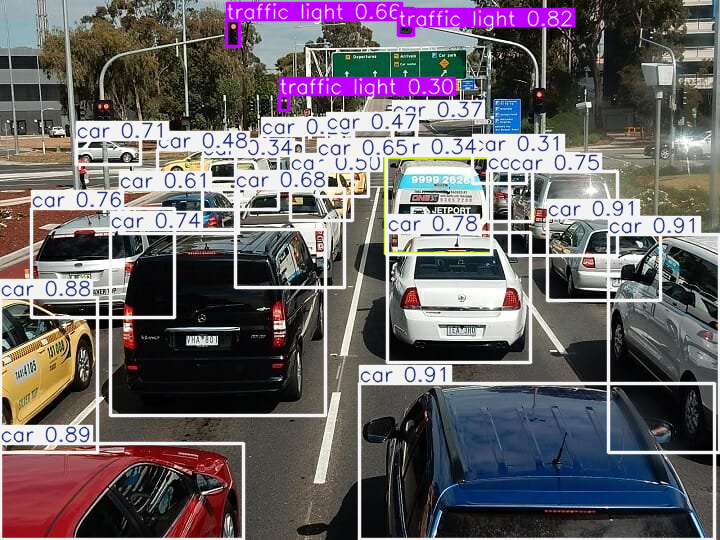

In [9]:
from ultralytics import YOLO
import cv2
from google.colab.patches import cv2_imshow
model = YOLO("yolov8n.pt")
results = model(image_path)[0]
object_counts = {}

for box in results.boxes:
    cls_id = int(box.cls[0])
    class_name = model.names[cls_id]
    object_counts[class_name] = object_counts.get(class_name, 0) + 1
print("Detected Objects:")
for obj, count in object_counts.items():
    print(f"{obj.capitalize()}: {count}")
annotated = results.plot()
cv2_imshow(annotated)
